# Data Analysis and Predicting Popularity

In [464]:
import numpy as np
import pandas as pd

## Cleaning

In [465]:
data = pd.read_csv("data.csv")

In [466]:
data.head()

,Unnamed: 0,id,name,popularity,alb_name,alb_release_date,alb_total_tracks,disc_number,track_number,explicit,...,bc underground hip hop,golden age hip hop,old school hip hop,modern blues,new wave,christian indie,indiecoustica,classic soul,northern soul,skate punk
0,0,3y1t2sEahs8idFz2tiYNPO,Let Me See Ya Girl,57,Cole Swindell,2014-02-18,12,1,5,False,...,0,0,0,0,0,0,0,0,0,0
1,1,5ehN5A3B3lDwmFCYO63Wk6,2016,56,SOUTHSIDE,2020-04-03,12,1,1,False,...,0,0,0,0,0,0,0,0,0,0
2,2,47HA2S1j9yj34Ff1aIsF5Y,Deal With It (feat. Kelis),57,Deal With It (feat. Kelis),2021-01-12,3,1,1,True,...,0,0,0,0,0,0,0,0,0,0
3,3,0DqVcM4kkBSvVr90o5c96k,Song for the Saints,44,Songs for the Saints,2018-07-27,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
4,4,50mf5MGiYq7C4bw1vAj2Ls,Man in the Mirror,31,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",1995-06-16,29,1,8,False,...,0,0,0,0,0,0,0,0,0,0


In [467]:
data.shape

(53334, 368)

There are a lot of songs with the same name but different ids because they were released multiple times (for example, both in an original album and the deluxe version). We need to remove the duplicate songs and keep the ones with the highest popularity.

In [468]:
d = {}
#iterate through song names
for i in range(len(data['name'])):
    #check if given song name in dictionary
    if data['name'][i] in d.keys():
        #if in dict, check if this song has higher pop than one in dict
        if data['popularity'][i] > d[data['name'][i]][1]:
            #if song has higher pop than one in dict, update dict entry for higher pop
            d[data['name'][i]]=(data['id'][i], data['popularity'][i])
    else:
        #if song not in dict, add first instance of it
        d[data['name'][i]]=(data['id'][i], data['popularity'][i])            

In [469]:
print(len(d.keys()))

37003


In [470]:
ids = []
for song in d:
    ids.append(d[song][0])

In [471]:
data = data[data['id'].isin(ids)]
data

,Unnamed: 0,id,name,popularity,alb_name,alb_release_date,alb_total_tracks,disc_number,track_number,explicit,...,bc underground hip hop,golden age hip hop,old school hip hop,modern blues,new wave,christian indie,indiecoustica,classic soul,northern soul,skate punk
0,0,3y1t2sEahs8idFz2tiYNPO,Let Me See Ya Girl,57,Cole Swindell,2014-02-18,12,1,5,False,...,0,0,0,0,0,0,0,0,0,0
1,1,5ehN5A3B3lDwmFCYO63Wk6,2016,56,SOUTHSIDE,2020-04-03,12,1,1,False,...,0,0,0,0,0,0,0,0,0,0
3,3,0DqVcM4kkBSvVr90o5c96k,Song for the Saints,44,Songs for the Saints,2018-07-27,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
5,5,0BleHROB2SxV7jv9dOQr7J,"No One - Live at Metropolis Studios, New York,...",33,Alicia Keys - VH1 Storytellers,2013-06-23,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
8,8,0oK6aZFtGPCCQ83lChpGO3,Nolia (feat. Kevin Gates),42,Nuthin' 2 Prove,2018-10-19,15,1,13,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53327,53327,5AQECaHQjzaSw70uPhKaN1,Limes,30,Moonshine in the Trunk,2014-08-25,15,1,7,False,...,0,0,0,0,0,0,0,0,0,0
53330,53330,1zB4vmk8tFRmM9UULNzbLB,Thunder,84,Evolve,2017-06-23,12,1,10,False,...,0,0,0,0,0,0,0,0,0,0
53331,53331,72thVF831OMzeCZzlkDN6R,Good Morning Beautiful,43,Deftones,2003-05-19,11,1,4,False,...,0,0,0,0,0,0,0,0,0,0
53332,53332,2FEWcWHnDmGD6WSqpW4VYu,This I Love,59,Chinese Democracy,2008-11-23,14,1,13,False,...,0,0,0,0,0,0,0,0,0,0


In [472]:
data = data.drop(columns = ['Unnamed: 0']).reset_index()

We also need to map the timestamps to numbers. We're going to use Unix time.

In [473]:
from datetime import datetime

In [474]:
for i in range(len(data['alb_release_date'])):
    if(len(data['alb_release_date'][i])==4):
        data['alb_release_date'][i]=datetime.fromisoformat(data['alb_release_date'][i]+'-06-01').timestamp()
    elif(len(data['alb_release_date'][i])==7):
        data['alb_release_date'][i]=datetime.fromisoformat(data['alb_release_date'][i]+'-01').timestamp()
    else:
        data['alb_release_date'][i]=datetime.fromisoformat(data['alb_release_date'][i]).timestamp()

<ipython-input-474-73bea3899958>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['alb_release_date'][i]=datetime.fromisoformat(data['alb_release_date'][i]).timestamp()
<ipython-input-474-73bea3899958>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['alb_release_date'][i]=datetime.fromisoformat(data['alb_release_date'][i]+'-06-01').timestamp()
<ipython-input-474-73bea3899958>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [475]:
data.head()

,index,id,name,popularity,alb_name,alb_release_date,alb_total_tracks,disc_number,track_number,explicit,...,bc underground hip hop,golden age hip hop,old school hip hop,modern blues,new wave,christian indie,indiecoustica,classic soul,northern soul,skate punk
0,0,3y1t2sEahs8idFz2tiYNPO,Let Me See Ya Girl,57,Cole Swindell,1392699600.0,12,1,5,False,...,0,0,0,0,0,0,0,0,0,0
1,1,5ehN5A3B3lDwmFCYO63Wk6,2016,56,SOUTHSIDE,1585886400.0,12,1,1,False,...,0,0,0,0,0,0,0,0,0,0
2,3,0DqVcM4kkBSvVr90o5c96k,Song for the Saints,44,Songs for the Saints,1532664000.0,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
3,5,0BleHROB2SxV7jv9dOQr7J,"No One - Live at Metropolis Studios, New York,...",33,Alicia Keys - VH1 Storytellers,1371960000.0,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
4,8,0oK6aZFtGPCCQ83lChpGO3,Nolia (feat. Kevin Gates),42,Nuthin' 2 Prove,1539921600.0,15,1,13,True,...,0,0,0,0,0,0,0,0,0,0


### Artists
We need to add columns for artists so that users can provide specifications about them.

In [476]:
artists = data['main_artist'].unique()

In [477]:
def manyhot(art_lists, unique_arts):
    df = pd.DataFrame()
    for g in unique_arts:
        cat = [int(g in i) for i in art_lists]
        df[g.lower()] = cat
    return df

artist_data = manyhot(data['main_artist'], artists)

In [478]:
data = pd.concat((data, artist_data), axis=1)

In [479]:
data

,index,id,name,popularity,alb_name,alb_release_date,alb_total_tracks,disc_number,track_number,explicit,...,mack 10,years & years,rich brian,lorenzo,kevin abstract,cashflow harlem,kavinsky,method man,billy eichner,broke boy lord
0,0,3y1t2sEahs8idFz2tiYNPO,Let Me See Ya Girl,57,Cole Swindell,1392699600.0,12,1,5,False,...,0,0,0,0,0,0,0,0,0,0
1,1,5ehN5A3B3lDwmFCYO63Wk6,2016,56,SOUTHSIDE,1585886400.0,12,1,1,False,...,0,0,0,0,0,0,0,0,0,0
2,3,0DqVcM4kkBSvVr90o5c96k,Song for the Saints,44,Songs for the Saints,1532664000.0,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
3,5,0BleHROB2SxV7jv9dOQr7J,"No One - Live at Metropolis Studios, New York,...",33,Alicia Keys - VH1 Storytellers,1371960000.0,11,1,1,False,...,0,0,0,0,0,0,0,0,0,0
4,8,0oK6aZFtGPCCQ83lChpGO3,Nolia (feat. Kevin Gates),42,Nuthin' 2 Prove,1539921600.0,15,1,13,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,53327,5AQECaHQjzaSw70uPhKaN1,Limes,30,Moonshine in the Trunk,1408939200.0,15,1,7,False,...,0,0,0,0,0,0,0,0,0,0
36999,53330,1zB4vmk8tFRmM9UULNzbLB,Thunder,84,Evolve,1498190400.0,12,1,10,False,...,0,0,0,0,0,0,0,0,0,0
37000,53331,72thVF831OMzeCZzlkDN6R,Good Morning Beautiful,43,Deftones,1053316800.0,11,1,4,False,...,0,0,0,0,0,0,0,0,0,0
37001,53332,2FEWcWHnDmGD6WSqpW4VYu,This I Love,59,Chinese Democracy,1227416400.0,14,1,13,False,...,0,0,0,0,0,0,0,0,0,0


In [480]:
# final clean-up
data['explicit'] = data['explicit'].map(lambda x: int(x))
data['alb_release_date'] = data['alb_release_date'].map(lambda x: int(x))
data = data.drop(columns = ['alb_name','index'])

In [481]:
data.head()

,id,name,popularity,alb_release_date,alb_total_tracks,disc_number,track_number,explicit,main_artist,num_artists,...,mack 10,years & years,rich brian,lorenzo,kevin abstract,cashflow harlem,kavinsky,method man,billy eichner,broke boy lord
0,3y1t2sEahs8idFz2tiYNPO,Let Me See Ya Girl,57,1392699600,12,1,5,0,Cole Swindell,1,...,0,0,0,0,0,0,0,0,0,0
1,5ehN5A3B3lDwmFCYO63Wk6,2016,56,1585886400,12,1,1,0,Sam Hunt,1,...,0,0,0,0,0,0,0,0,0,0
2,0DqVcM4kkBSvVr90o5c96k,Song for the Saints,44,1532664000,11,1,1,0,Kenny Chesney,1,...,0,0,0,0,0,0,0,0,0,0
3,0BleHROB2SxV7jv9dOQr7J,"No One - Live at Metropolis Studios, New York,...",33,1371960000,11,1,1,0,Alicia Keys,1,...,0,0,0,0,0,0,0,0,0,0
4,0oK6aZFtGPCCQ83lChpGO3,Nolia (feat. Kevin Gates),42,1539921600,15,1,13,1,Lil Yachty,2,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

In [552]:
def plot_hist(col_name, log):
    if log:
        transformed = np.log(data[col_name]*100 + 1)
        plt.hist(transformed, bins=50)
        plt.title('log of ' + col_name)
    else:
        plt.hist(data[col_name], bins=50)
        plt.title(col_name)
    plt.ylabel('frequency')
    plt.show()

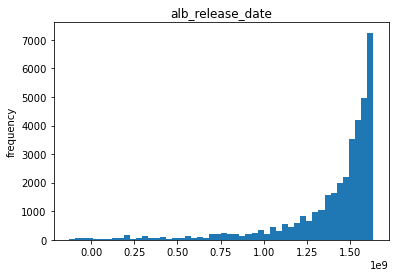

In [553]:
plot_hist("alb_release_date", False)

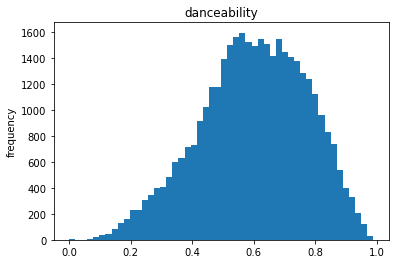

In [554]:
plot_hist("danceability", False)

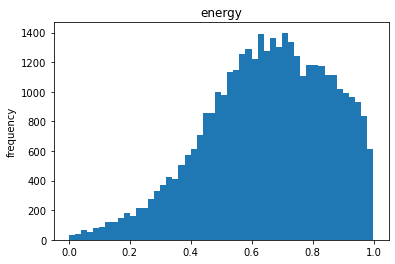

In [555]:
plot_hist("energy", False)

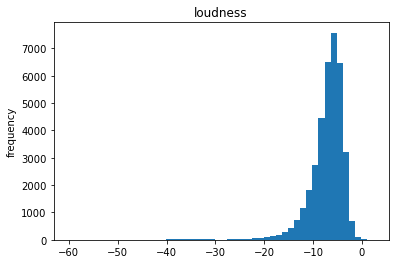

In [556]:
plot_hist("loudness", False)

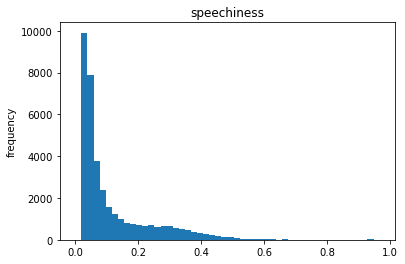

In [557]:
plot_hist("speechiness", False)

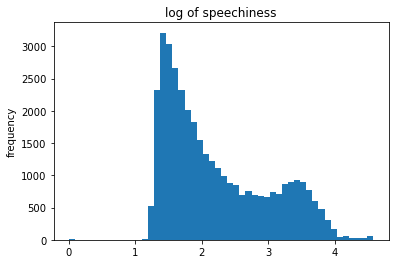

In [558]:
plot_hist("speechiness", True)

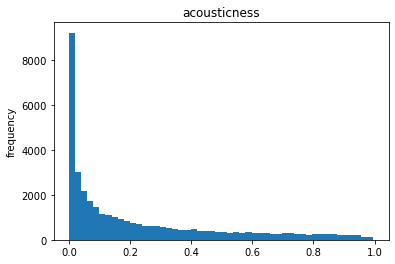

In [559]:
plot_hist("acousticness", False)

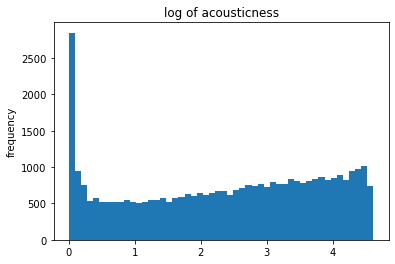

In [560]:
plot_hist("acousticness", True)

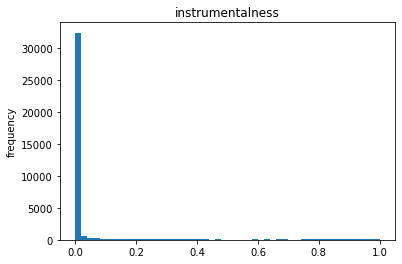

In [561]:
plot_hist("instrumentalness", False)

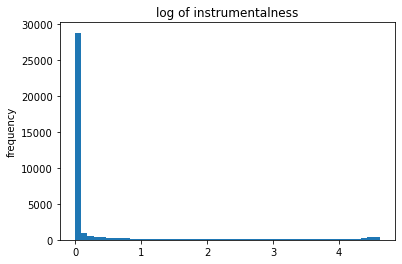

In [562]:
plot_hist("instrumentalness", True)

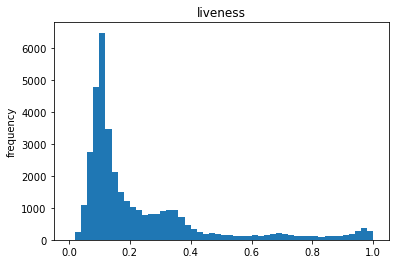

In [563]:
plot_hist("liveness", False)

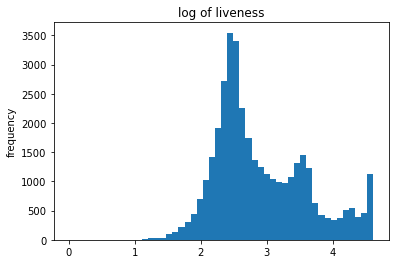

In [564]:
plot_hist("liveness", True)

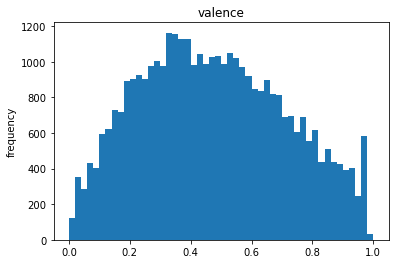

In [565]:
plot_hist("valence", False)

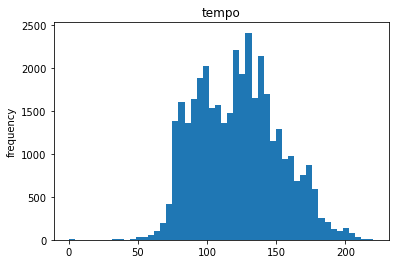

In [566]:
plot_hist("tempo", False)

In [570]:
interactions = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']]

In [571]:
import seaborn as sns

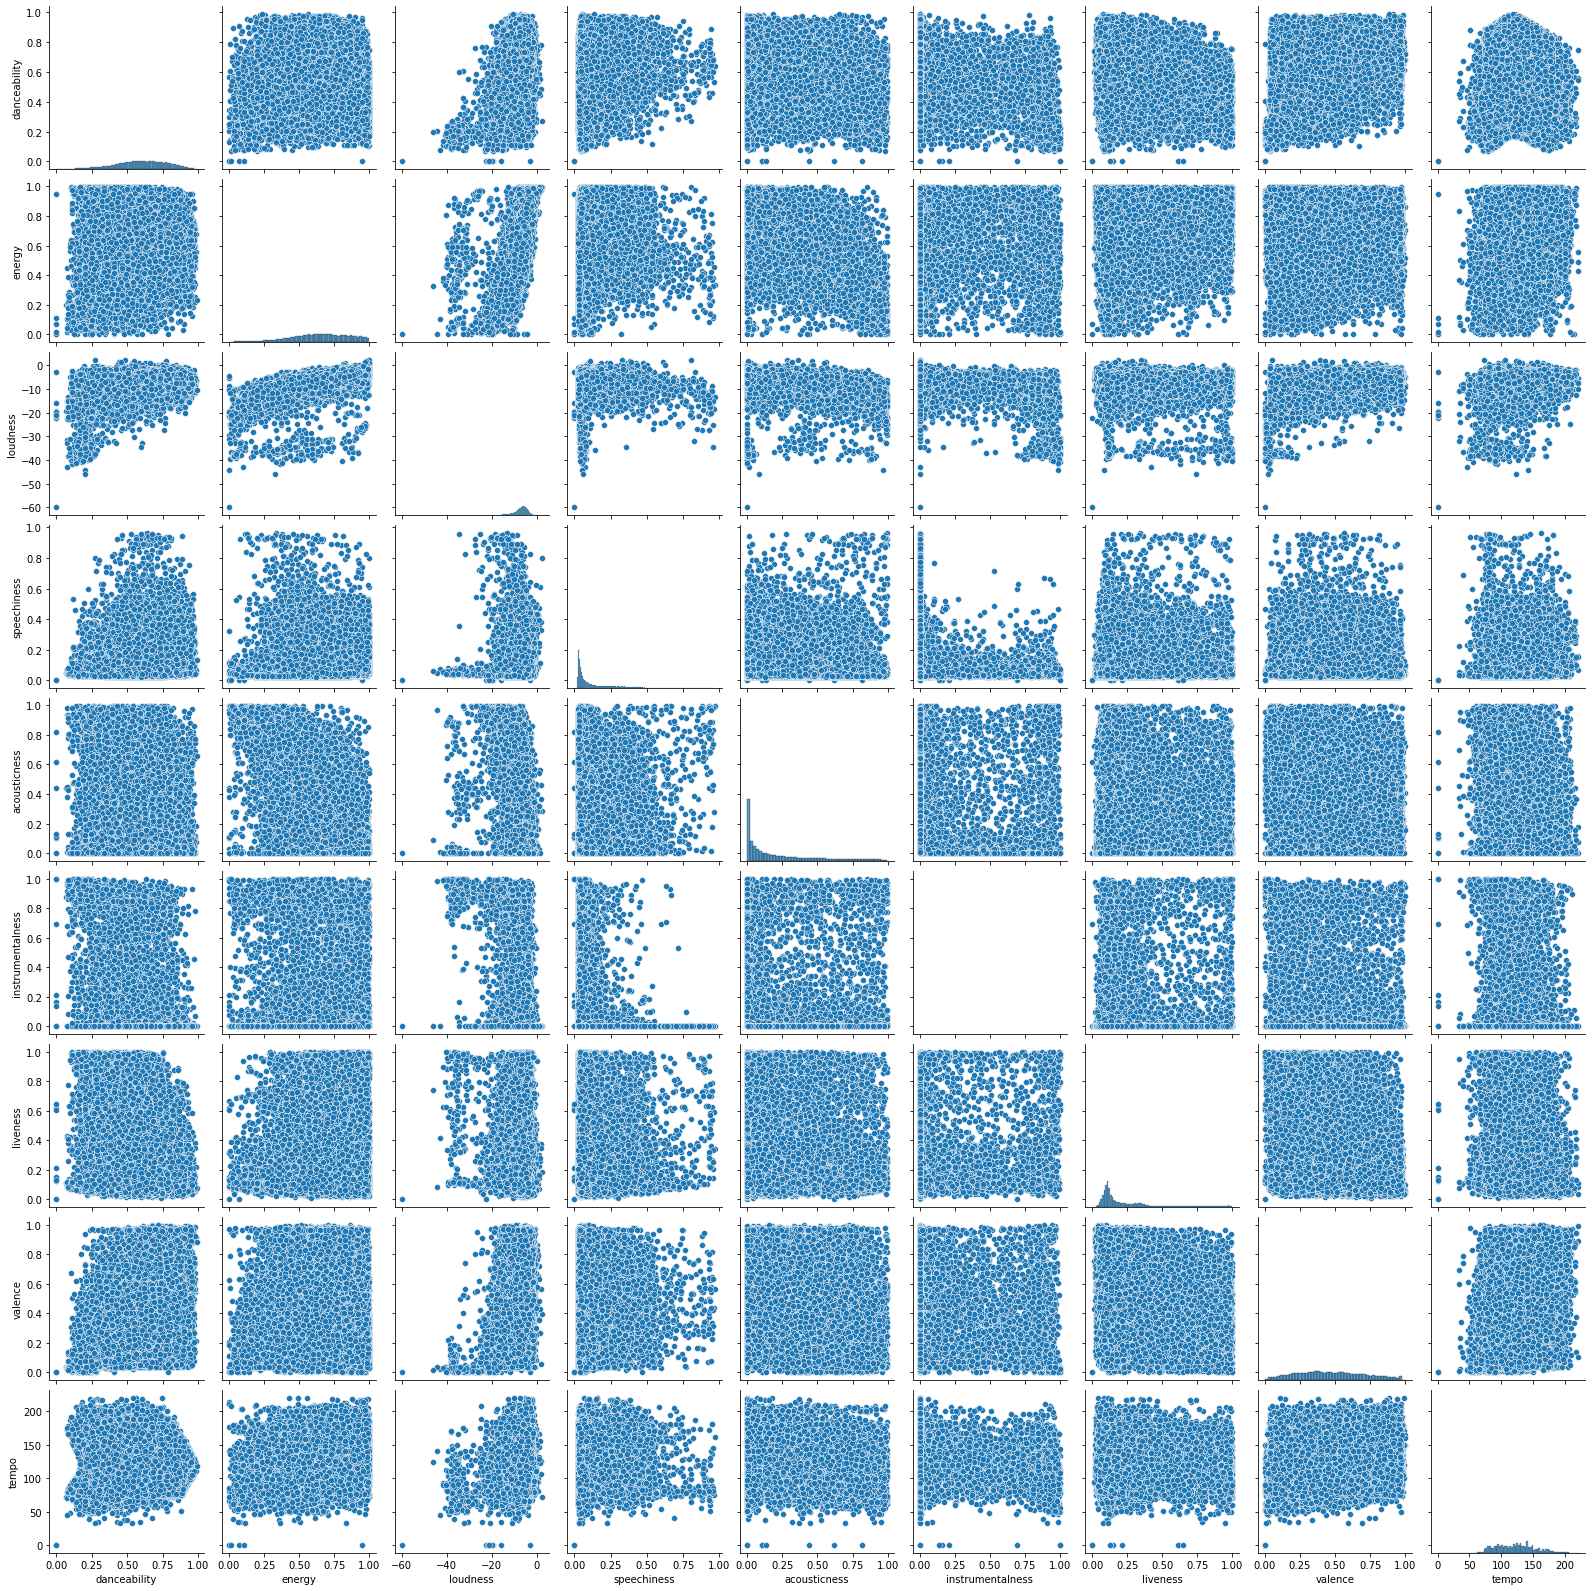

In [572]:
sns.pairplot(interactions)

<AxesSubplot:>

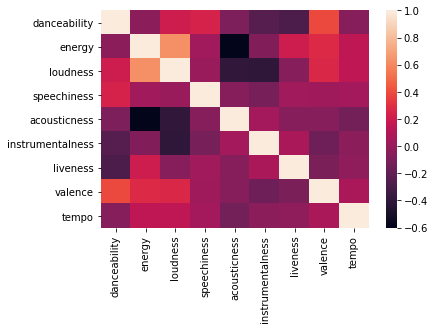

In [573]:
sns.heatmap(interactions.corr())

In [588]:
corr = interactions.corr()
corr[abs(corr) > 0.3]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.387714,NaN
energy,NaN,1.000000,0.625886,NaN,-0.602823,NaN,NaN,NaN,NaN
loudness,NaN,0.625886,1.000000,NaN,-0.390402,-0.405798,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,-0.602823,-0.390402,NaN,1.000000,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,-0.405798,NaN,NaN,1.000000,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
valence,0.387714,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Since energy is fairly highly correlated with loudness, and we don't see how a user would know how to choose loudness, we will drop loudness from the dataset.

In [583]:
data = data.drop(columns=['loudness'])

## Predicting Popularity

Since we have many categorical variables and many variables already between 0 and 1, along with the fact that many aren't normally distributed, we will scale all data to between 0 and 1.

In [684]:
y = data['popularity']
X = data.drop(columns=['popularity', 'id', 'name','main_artist'])
X_normed = (X-X.min()) / (X.max()-X.min())
X_stdnormed = (X-X.mean()) / X.std()
y_stdnormed = (y-y.mean()) / y.std()

In [685]:
knndata = X_normed.copy()
knndata['id'] = data['id']
knndata['name'] = data['name']
knndata['artist'] = data['main_artist']
knndata.to_csv('knndata.csv')

We plan on using k-NN and/or k-means eventually to find similar songs to the user's preferences. Because of the curse of dimensionality, these algorithms suffer from high dimensional data. However, we can't reduce the dimensionality with an unsupervised algorithm because we will lose the interpretability of features, which is necessary for the user. Therefore, we will try lasso regression and control burn to predict popularity with very few features. This will enable us to reduce the data to just those features and allow the user to decide some or all of those.

### Lasso Regression

In [693]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
X_train, X_test, y_train, y_test = train_test_split(X_stdnormed, y_stdnormed, test_size=0.2)

def MSE(y, pred):
    return np.sum((y-pred)**2)/len(y)

def lasso(train_y, test_y, train_x, test_x, lam):
    model = Lasso(alpha=lam, tol=0.001).fit(train_x, train_y)
            
    w = np.array(model.coef_).flatten()
    
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)

    train_MSE = MSE(train_y, train_pred)
    test_MSE = MSE(test_y, test_pred)
    
    return train_MSE, test_MSE, w, test_pred

In [694]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [695]:
def kfold(k, lambdavals):
    cv = KFold(n_splits = k)

    for lam in lambdavals:
        avg_train_MSE = 0
        avg_val_MSE = 0

        for train_index, val_index in cv.split(X_train):
            X_traink, X_val = X_train[train_index], X_train[val_index]
            y_traink, y_val = y_train[train_index], y_train[val_index]
            train_MSE, val_MSE, w, pred = lasso(y_traink, y_val, X_traink, X_val, lam)
            
            avg_train_MSE += train_MSE
            avg_val_MSE += val_MSE

        avg_train_MSE = avg_train_MSE/k
        avg_val_MSE = avg_val_MSE/k

        print(f'lambda: {lam}, avg_train_MSE: {avg_train_MSE}, avg_val_MSE: {avg_val_MSE}')

In [696]:
kfold(5, [0.0001, 0.001, 0.01, 0.1, 1])

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+02, tolerance: 2.370e+01
  model = cd_fast.enet_coordinate_descent(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.190e+02, tolerance: 2.375e+01
  model = cd_fast.enet_coordinate_descent(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

lambda: 0.0001, avg_train_MSE: 0.5778845543442241, avg_val_MSE: 0.6201299436802283
lambda: 0.001, avg_train_MSE: 0.5789486295356878, avg_val_MSE: 0.6184766654920548
lambda: 0.01, avg_train_MSE: 0.630500475756444, avg_val_MSE: 0.6507155310436041
lambda: 0.1, avg_train_MSE: 0.8434390904450139, avg_val_MSE: 0.8441622118641234
lambda: 1, avg_train_MSE: 1.0028649599937651, avg_val_MSE: 1.0030739790248264


In [697]:
kfold(5, [0.0006, 0.0008, 0.001, 0.0012, 0.0014])

lambda: 0.0006, avg_train_MSE: 0.5782896003332204, avg_val_MSE: 0.618908657280499
lambda: 0.0008, avg_train_MSE: 0.5785810923194054, avg_val_MSE: 0.618639151185682
lambda: 0.001, avg_train_MSE: 0.5789486295356878, avg_val_MSE: 0.6184766654920548
lambda: 0.0012, avg_train_MSE: 0.5793612792204582, avg_val_MSE: 0.618373458038207
lambda: 0.0014, avg_train_MSE: 0.5798187068208633, avg_val_MSE: 0.6183033724707736


Since a lambda of 0.01 is the lowest regularization without a big jump in MSE, we will use that in our final model to end up with as few features as possible.

In [613]:
model = Lasso(alpha=0.01, tol=0.001).fit(X_normed, y)

In [614]:
w = np.array(model.coef_).flatten()

c = 0
signif = []
for i in range(len(w)):
    if w[i] != 0:
        c+=1
        signif.append(cols[i])
signif

['alb_release_date',
 'alb_total_tracks',
 'disc_number',
 'track_number',
 'explicit',
 'num_artists',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'time_signature',
 'main_fols',
 'main_pop',
 'tot_fols',
 'canadian pop',
 'hip hop',
 'toronto rap',
 'baton rouge rap',
 'trap',
 'chicago rap',
 'pop',
 'melodic rap',
 'dance pop',
 'lgbtq+ hip hop',
 'conscious hip hop',
 'north carolina hip hop',
 'canadian contemporary r&b',
 'contemporary country',
 'florida rap',
 'trap latino',
 'pop rap',
 'southern hip hop',
 'dfw rap',
 'uk pop',
 'country',
 'chicago drill',
 'dark trap',
 'west coast rap',
 'memphis hip hop',
 'emo rap',
 'k-pop boy group',
 'barbadian pop',
 'kentucky hip hop',
 'british invasion',
 'merseybeat',
 'psychedelic rock',
 'rock',
 'r&b',
 'outlaw country',
 'houston rap',
 'trap queen',
 'modern rock',
 'oakland hip hop',
 'reggaeton colombiano',
 'hip pop',
 'indie po

In [615]:
len(signif)

175

In [616]:
train_MSE, test_MSE, w, pred = lasso(y_train, y_test, X_train, X_test, 0.01)

In [617]:
print(f'Train MSE: {train_MSE}\nTest MSE: {test_MSE}')

Train MSE: 107.48677742177698
Test MSE: 110.77429628165437


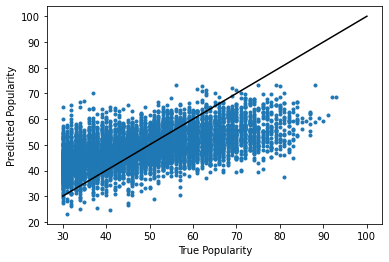

In [618]:
xy = [30,100]
plt.scatter(y_test, pred, marker='.')
plt.plot(xy,xy,color='black')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

### ControlBurn

In [670]:
from ControlBurn.ControlBurn import ControlBurnRegressor

In [659]:
X_stdnormed = (X-X.mean()) / X.std()

In [681]:
def controlburn(train_y, test_y, train_x, test_x, lam):
    cb = ControlBurnRegressor(alpha = lam, build_forest_method='bag')
    cb.fit(train_x, train_y)
    
    feats_selected = cb.features_selected_
    feat_importances = cb.feature_importances_
    
    train_pred = cb.predict(train_x)
    test_pred = cb.predict(test_x)

    train_MSE = MSE(train_y, train_pred)
    test_MSE = MSE(test_y, test_pred)
    
    return train_MSE, test_MSE, feats_selected, feat_importances, test_pred

After trying controlburn a few times, it takes about 8 minutes to run when we use the fastest build_forest_method (bag). Therefore, it is too slow for k-fold cross-validation. Instead, we will just make a test set and try out different values of lambda.

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X_stdnormed, y_stdnormed, test_size=0.3)

In [683]:
for lam in [0.01, 0.001, 0.0001, 0.00001]:
    train_MSE, test_MSE, feats_selected, feat_importances, test_pred = controlburn(
        y_train, y_test, X_train, X_test, 0.01)
    print(f'lambda: {lam}, train_MSE: {train_MSE}, test_MSE: {test_MSE}')

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


lambda: 0.01, train_MSE: 0.07743323906314184, test_MSE: 0.5529193890411005
lambda: 0.001, train_MSE: 0.07729738320432744, test_MSE: 0.5559798101517159


/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


lambda: 0.0001, train_MSE: 0.07663184569460257, test_MSE: 0.5605729565789408
lambda: 1e-05, train_MSE: 0.07700466527849748, test_MSE: 0.5552353523137162
